In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
class_num = 2

## Model

In [3]:
from keras.preprocessing import image
from keras.models import Sequential, model_from_json
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import utils, optimizers, applications

/home/phongsathron/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# model = Sequential()
# model.add(applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(244,224,3)))
# model.add(Flatten())
# model.add(Dense(class_num, activation='softmax'))

In [5]:
# model.summary()

In [6]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

model = model_from_json(loaded_model_json)
# load weights into new model
# loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 200706    
Total params: 23,788,418
Trainable params: 23,735,298
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
# optimizer = optimizers.Adam()
# model.compile(loss="categorical_crossentropy",
#             optimizer=optimizer,
#             metrics=['accuracy'])

In [9]:
model.load_weights("test3.h5")

In [10]:
# from keras import optimizers
# optimizer = optimizers.Adam()

In [11]:
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizer,
#               metrics=['accuracy'])

In [47]:
img = image.load_img(os.path.abspath("texting_message_190.jpg"), target_size=(224, 224))

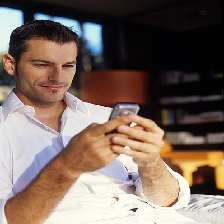

In [48]:
img

In [23]:
# imgs = np.empty((1,224,224,3),dtype="float32")
# img = np.asarray(img, dtype="float32")
# img = img.reshape((224, 224, 3))
# imgs[0,:,:,:] = img
# imgs.shape

In [ ]:
labels = [""]

In [50]:
img = np.array(img)
img = img.reshape(1, 224, 224, 3)

In [55]:
test = model.predict(img)

In [56]:
test2 = model.predict_classes(img)

In [57]:
test.argmax()

1

In [58]:
test2

array([1])